In [3]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn import metrics
from sklearn.model_selection import ParameterGrid

from timeit import default_timer as timer
from dateutil.parser import parse
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [4]:
#import the dataframe
eq = pd.read_csv('earthquake_database.csv')

display(eq.head(10))

eq.info()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [5]:
#eq.profile_report()

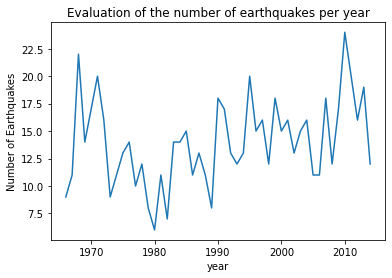

In [6]:
#Convert years to dates
eq['Date'] = pd.to_datetime(eq['Date'], utc=True)

eq['year'] = eq['Date'].dt.year

#Filter on earthquakes with magnitude of 7 or higher
eq = eq[eq['Magnitude'] >= 7]

#Compute a count of earthquakes per year
earthquakes_per_year = eq.groupby('year').count()

#Remove erroneous values for year
earthquakes_per_year = earthquakes_per_year.iloc[1:-2,0]

#Make a plot of earthquakes per year
ax = earthquakes_per_year.plot()
ax.set_ylabel('Number of Earthquakes')
plt.title('Evaluation of the number of earthquakes per year')
plt.show()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1966 to 2014
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   this_year  49 non-null     int64  
 1   past_year  48 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


None

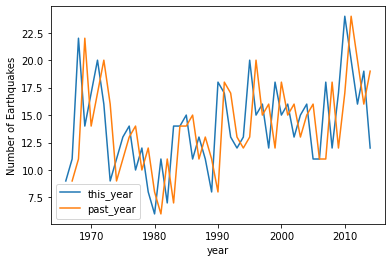

In [7]:
shifts = pd.DataFrame({'this_year': earthquakes_per_year,
                       'past_year': earthquakes_per_year.shift(1)})

display(shifts.info())

ax = shifts.plot()
ax.set_ylabel('Number of Earthquakes')
plt.show()

In [8]:
shifts = shifts.dropna()

shifts.corr()

,this_year,past_year
this_year,1.000000,0.313667
past_year,0.313667,1.000000


In [9]:
result = adfuller(earthquakes_per_year.dropna())
print(result)

pvalue = result[1]

if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')

(-5.008806133844327, 2.1319566272140453e-05, 0, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 202.7529751691226)
stationary


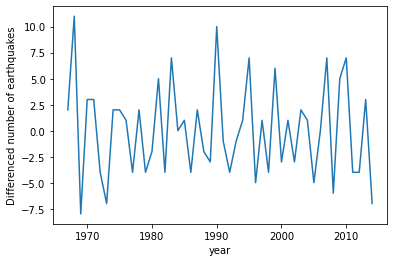

In [10]:
#Difference the data
differenced_data = earthquakes_per_year.diff().dropna()

#Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Differenced number of earthquakes')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1967 to 2014
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   this_year  48 non-null     float64
 1   past_year  47 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


None

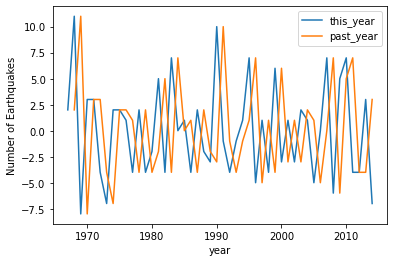

,this_year,past_year
this_year,1.000000,-0.376859
past_year,-0.376859,1.000000


In [11]:
shifts_diff = pd.DataFrame({'this_year': differenced_data,
                            'past_year': differenced_data.shift(1)})

display(shifts_diff.info())

ax = shifts_diff.plot()
ax.set_ylabel('Number of Earthquakes')
plt.show()

shifts_diff.corr()

## Lags in Autocorrelation

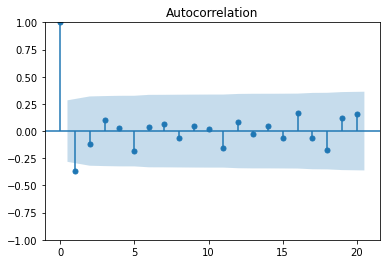

In [12]:
plot_acf(differenced_data, lags=20)
plt.show()

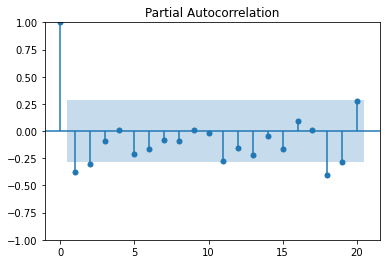

In [13]:
plot_pacf(differenced_data, lags=20)
plt.show()

### Estimating the ar Using yule_walker Equations

In [14]:
from statsmodels.regression.linear_model import yule_walker

coefficients, sigma = yule_walker(differenced_data, order = 3)
print('coefficients: ', -coefficients)
print('sigma: ', sigma)

coefficients:  [0.51636104 0.34981679 0.08922855]
sigma:  3.99051873543974


### make a forecast with the ar coefficients

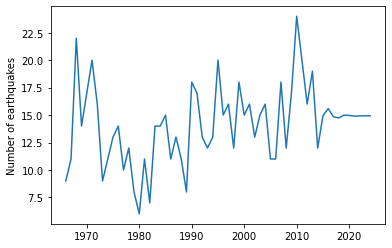

In [15]:
#Make a list of differenced values
val_list = list(differenced_data)

#Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()

#Define the number of years to predict
n_steps = 10

#For each year to predict
for i in range(n_steps):

    #Compute the new as the sum of lagged values multipled byu their corresponding coefficient
    new_val = 0

    for j in range(len(coefficients)):
        new_val += coefficients[j] * val_list[j]

    #Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

#Redo the reverse to have the order of time
val_list.reverse()

#Add the original first value back into the list and do a cumulative sum to undo the differencing
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

#Plot the newly obtained list
plt.plot(range(1966,2025), new_val_list)
plt.ylabel('Number of earthquakes')
plt.show()

### Train-Test Evaluation and Tuning

Test R2:  -0.040346700807336155


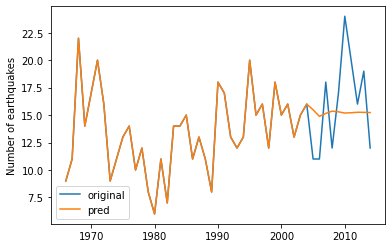

In [16]:
from sklearn.metrics import r2_score

train = list(differenced_data)[:-10]
test = list(differenced_data)[-10:]

coefficients, sigma = yule_walker(train, order = 3)

#Make a list of differenced values
val_list = list(train)

#Reverse the list so that order corresponds with order of the coefficients
val_list.reverse()

#Define the number of years predict
n_steps = 10

#For each year to predict
for i in range(n_steps):
    #Compute the new as the sum of lagged values multipled byu their corresponding coefficient
    new_val = 0

    for j in range(len(coefficients)):
        new_val += coefficients[j] * val_list[j]

    #Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

#Redo the reverse to have the order of time
val_list.reverse()

#Add the original first value back into the list and do a cumulative sum to undo the differencing
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

#Plot the newly obtained list
validation = pd.DataFrame({
    'original': earthquakes_per_year.reset_index(drop=True),
    'pred': new_val_list})

print('Test R2: ', r2_score(validation.iloc[-10:,0], validation.iloc[-10:,1]))

#Plot the newly obtained list
plt.plot(range(1966,2015), validation)
plt.legend(validation.columns)
plt.ylabel('Number of earthquakes')
plt.show()

### Apply a grid search to find the order that givbes the best R2 score on the test data

In [17]:
from symbol import eval_input


def evaluate(order):
    
    train = list(differenced_data)[:-10]
    test = list(differenced_data)[-10:]

    coefficients, sigma = yule_walker(train, order = order)

    #Make a list of differenced values
    val_list = list(train)

    #Reverse the list so that order corresponds with order of the coefficients
    val_list.reverse()

    #Define the number of years predict
    n_steps = 10

    #For each year to predict
    for i in range(n_steps):
        #Compute the new as the sum of lagged values multipled byu their corresponding coefficient
        new_val = 0

        for j in range(len(coefficients)):
            new_val += coefficients[j] * val_list[j]

        #Insert the new value at the beginning of the list
        val_list.insert(0, new_val)

    #Redo the reverse to have the order of time
    val_list.reverse()

    #Add the original first value back into the list and do a cumulative sum to undo the differencing
    val_list = [earthquakes_per_year.values[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()

    #Plot the newly obtained list
    validation = pd.DataFrame({
        'original': earthquakes_per_year.reset_index(drop=True),
        'pred': new_val_list})

    return r2_score(validation.iloc[-10:,0], validation.iloc[-10:,1])

#For each between 1 and 30, fit and evaluate the model
orders = []
r2scores = []

for order in range(1,31):
    orders.append(order)
    r2scores.append(evaluate(order))

#Create a results a dataframe
results = pd.DataFrame({'orders': orders, 'scores': r2scores})

#Show the order with best R2 score
results[results['scores'] == results.max()['scores']]


,orders,scores
18,19,0.133872


Test R2:  0.13387153281323239


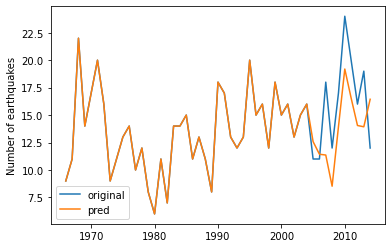

In [18]:
from sklearn.metrics import r2_score

train = list(differenced_data)[:-10]
test = list(differenced_data)[-10:]

coefficients, sigma = yule_walker(train, order = 19)

#Make a list of differenced values
val_list = list(train)

#Reverse the list so that order corresponds with order of the coefficients
val_list.reverse()

#Define the number of years predict
n_steps = 10

#For each year to predict
for i in range(n_steps):
    #Compute the new as the sum of lagged values multipled byu their corresponding coefficient
    new_val = 0

    for j in range(len(coefficients)):
        new_val += coefficients[j] * val_list[j]

    #Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

#Redo the reverse to have the order of time
val_list.reverse()

#Add the original first value back into the list and do a cumulative sum to undo the differencing
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

#Plot the newly obtained list
validation = pd.DataFrame({
    'original': earthquakes_per_year.reset_index(drop=True),
    'pred': new_val_list})

print('Test R2: ', r2_score(validation.iloc[-10:,0], validation.iloc[-10:,1]))

#Plot the newly obtained list
plt.plot(range(1966,2015), validation)
plt.legend(validation.columns)
plt.ylabel('Number of earthquakes')
plt.show()